# IMDb Top 250 Movies Analysis

## Import required libraries

In [868]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series

## Load data

In [869]:
df = pd.read_csv('imdbtop250.csv')
df.head()

,rank,title,year,director,duration(minutes),genre,rating,gross,oscars,awards,nominations
0,1,The Shawshank Redemption,1994,Frank Darabont,142,['Drama'],9.2,2.888450e+07,0,21,43
1,2,The Godfather,1972,Francis Ford Coppola,175,"['Crime', 'Drama']",9.2,2.503418e+08,3,31,30
2,3,The Dark Knight,2008,Christopher Nolan,152,"['Action', 'Crime', 'Drama']",9.0,1.006102e+09,2,159,163
3,4,The Godfather Part II,1974,Francis Ford Coppola,202,"['Crime', 'Drama']",9.0,4.796192e+07,6,17,20
4,5,12 Angry Men,1957,Sidney Lumet,96,"['Crime', 'Drama']",8.9,9.550000e+02,0,17,13


In [870]:
df.isnull().sum() # These are movies with no gross value given

rank                 0
title                0
year                 0
director             0
duration(minutes)    0
genre                0
rating               0
gross                7
oscars               0
awards               0
nominations          0
dtype: int64

## Add new column to write list items outside

In [871]:
genres = df['genre'].apply(lambda x: x[1:-1].replace("'", ''))
df.insert(loc=3, column='genres', value=genres)
df.drop('genre', inplace=True, axis=1)
df.head()

,rank,title,year,genres,director,duration(minutes),rating,gross,oscars,awards,nominations
0,1,The Shawshank Redemption,1994,Drama,Frank Darabont,142,9.2,2.888450e+07,0,21,43
1,2,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,175,9.2,2.503418e+08,3,31,30
2,3,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,152,9.0,1.006102e+09,2,159,163
3,4,The Godfather Part II,1974,"Crime, Drama",Francis Ford Coppola,202,9.0,4.796192e+07,6,17,20
4,5,12 Angry Men,1957,"Crime, Drama",Sidney Lumet,96,8.9,9.550000e+02,0,17,13


## Genre Analysis

### Seperate genres

In [872]:
df_copy = df.copy()
s = df_copy['genres'].str.split(', ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df_copy['genres']
df_copy = df_copy.join(s)
df_copy.head()

,rank,title,year,director,duration(minutes),rating,gross,oscars,awards,nominations,genres
0,1,The Shawshank Redemption,1994,Frank Darabont,142,9.2,2.888450e+07,0,21,43,Drama
1,2,The Godfather,1972,Francis Ford Coppola,175,9.2,2.503418e+08,3,31,30,Crime
1,2,The Godfather,1972,Francis Ford Coppola,175,9.2,2.503418e+08,3,31,30,Drama
2,3,The Dark Knight,2008,Christopher Nolan,152,9.0,1.006102e+09,2,159,163,Action
2,3,The Dark Knight,2008,Christopher Nolan,152,9.0,1.006102e+09,2,159,163,Crime


In [873]:
df_copy.shape

(626, 11)

In [874]:
df_copy['genres'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'History', 'Adventure',
       'Western', 'Romance', 'Sci-Fi', 'Fantasy', 'Mystery', 'Family',
       'Thriller', 'War', 'Comedy', 'Animation', 'Horror', 'Music',
       'Film-Noir', 'Musical', 'Sport'], dtype=object)

In [875]:
len(df_copy['genres'].unique())

21

In [876]:
df_copy['genres'].value_counts()

Drama        177
Adventure     59
Crime         51
Action        49
Comedy        47
Mystery       32
Thriller      30
Biography     29
Animation     23
War           23
Romance       23
Sci-Fi        20
Fantasy       16
Family        13
History        9
Western        6
Horror         5
Sport          5
Film-Noir      4
Music          4
Musical        1
Name: genres, dtype: int64

### Most Used Genres

In [877]:
plt.rcParams['figure.figsize'] = (15,8)

[Text(0.5, 0, 'Genres'), Text(0, 0.5, 'Count')]

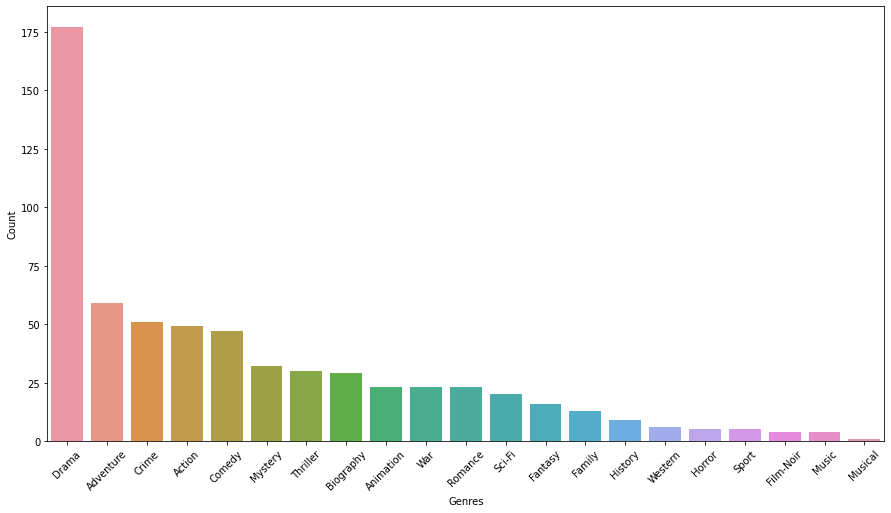

In [878]:
plt.xticks(rotation=45)
sns.countplot(x="genres", data=df_copy, order=df_copy['genres'].value_counts().index).set(xlabel="Genres", ylabel = "Count")

### Most Grossing Genres

#### First remove null values

In [879]:
df_gross = df_copy.dropna()
df_gross.isnull().sum()

rank                 0
title                0
year                 0
director             0
duration(minutes)    0
rating               0
gross                0
oscars               0
awards               0
nominations          0
genres               0
dtype: int64

In [880]:
gross_by_genre = df_gross[['genres','gross']]
gross_by_genre = gross_by_genre.groupby('genres').sum()
gross_by_genre.head()

,gross
genres,
Action,2.467280e+10
Adventure,3.018333e+10
Animation,1.117577e+10
Biography,4.259665e+09
Comedy,1.017438e+10


In [881]:
gross_by_genre['gross'] = gross_by_genre['gross'].map(lambda x: x/float(1000000000))
gross_by_genre['gross'] = gross_by_genre['gross'].map(lambda x: '{:.3f}'.format(x)).astype('float64')
gross_by_genre = gross_by_genre.sort_values(by='gross', ascending=False)
gross_by_genre.head()

,gross
genres,
Adventure,30.183
Drama,29.167
Action,24.673
Animation,11.176
Comedy,10.174


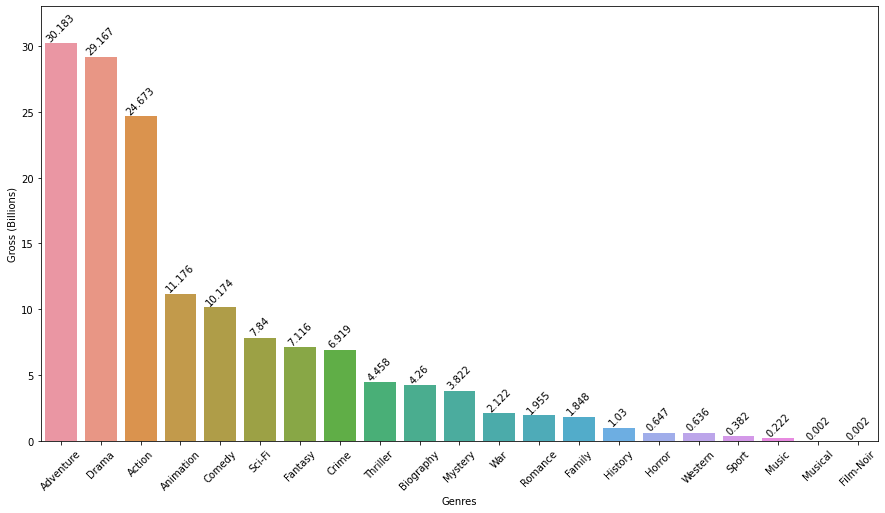

In [882]:
plt.xticks(rotation=45);
plt.yscale('linear')
plt.ylim(0,33)
sns.barplot(x=gross_by_genre.index, y='gross', data=gross_by_genre).set(xlabel="Genres", ylabel = "Gross (Billions)")
for i in range(len(gross_by_genre.index)):
    plt.text(i, gross_by_genre['gross'][i],gross_by_genre['gross'][i], ha='center', va='bottom', rotation=45,)

In [883]:
year_ratings = df.groupby('year').rating.mean()
year_ratings

year
1921    8.200000
1924    8.100000
1925    8.100000
1926    8.100000
1927    8.200000
          ...   
2018    8.300000
2019    8.233333
2020    8.200000
2021    8.100000
2022    8.300000
Name: rating, Length: 86, dtype: float64

<AxesSubplot:xlabel='year', ylabel='rating'>

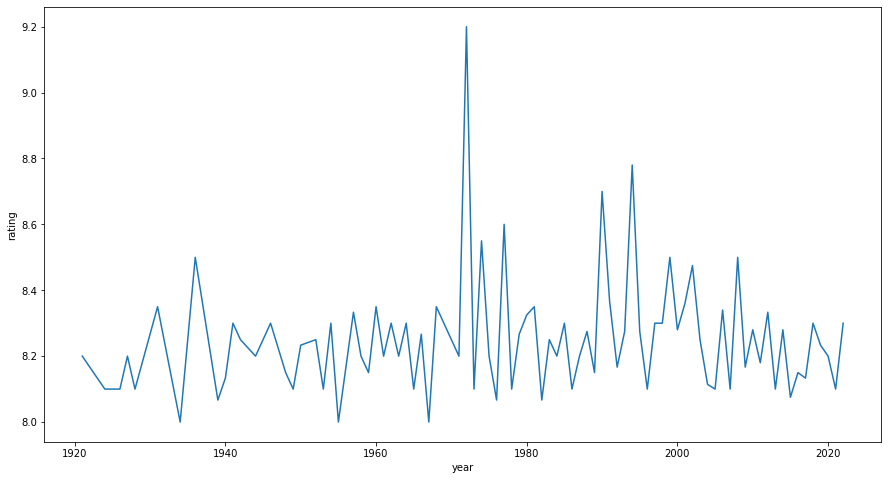

In [884]:
sns.lineplot(data=year_ratings)

In [885]:
#filters
before = df['year'] < 2000 
after = df['year'] >= 2000

In [886]:
df.loc[before].count()

rank                 153
title                153
year                 153
genres               153
director             153
duration(minutes)    153
rating               153
gross                149
oscars               153
awards               153
nominations          153
dtype: int64

In [887]:
df.loc[after].count()

rank                 97
title                97
year                 97
genres               97
director             97
duration(minutes)    97
rating               97
gross                94
oscars               97
awards               97
nominations          97
dtype: int64

([<matplotlib.patches.Wedge at 0x1a164a4d760>,
 [Text(-0.3791071783669761, 1.0326072570491793, 'Before 2000'),
  Text(0.3791071783669765, -1.0326072570491793, 'After 2000')],
 [Text(-0.20678573365471423, 0.5632403220268251, '61%'),
  Text(0.20678573365471442, -0.563240322026825, '39%')])

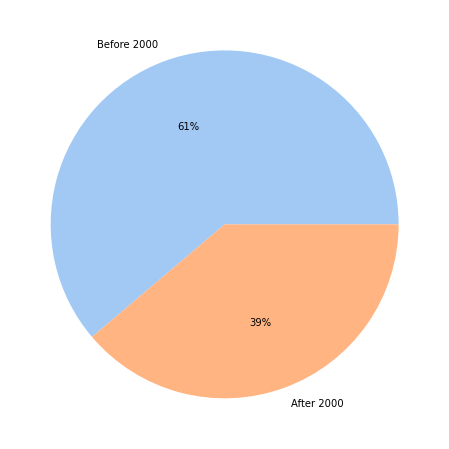

In [888]:
percent = [df.loc[before].title.count(), df.loc[after].title.count()]
labels = ['Before 2000', 'After 2000']
colors = sns.color_palette('pastel')[0:2]
plt.pie(percent, colors=colors, labels=labels, autopct='%.0f%%')
